In [1]:
import tabula
from tabula import read_pdf
import os
import pandas as pd
import tika
from tika import parser
import string
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
def get_tables(parsedPDF):
    # get the raw text and remove the empty spaces
    text_new=[e for e in parsedPDF['content'].split('\n') if e !='']
    #Remove all text, keep only numbers
    text_new=[e for e in text_new if not e[0].isalpha()]
    #Remove all annotations
    text_new=[e for e in text_new if e.split(' ')[0] !='(*)']
    text_new=[e for e in text_new if e.split(' ')[0] !='(**)']
    text_new=[e for e in text_new if e.split(' ')[0] !='(-)']
    #Remove columns titles
    text_new=[e for e in text_new if e.strip(' ')[0:2]!='20']
    #text_new=[e.replace('  ', 'nan') for e in text_new[0:8]]
    #Convert dashes in nan for the float conversion
    text_new=[e.replace('-', 'nan') for e in text_new[0:8]]
    text_new=[[float(i) for i in e.split(' ')] for e in text_new]
    def check(i):
        if i<10:
            return 1000*i
        else:
            return i
    text_new=[[check(i) for i in e] for e in text_new]
    table1=text_new[0::2]
    table2=text_new[1::2]
    return [table1,table2]

In [3]:
def correction(table):
    if set([str(e) for e in table[0]])==set(['nan']):
        return [table[0] for i in xrange(4)]
    a=[e for e in table[0]]
    index=0
    indices=[]
    while a:
        element=a.pop(0)
        if str(element)=='nan':
            indices.append(index)
        index+=1
    counter=0
    mask=[]
    for i in xrange(len(table[0])):
        if i in indices:
            mask.append(float('nan'))
        else:
            mask.append(table[1][counter])
            counter+=1
    table[1]=mask
    return table

Microzona_01.pdf
[1217.0, 1122.0, 1342.0, 1262.0, 1078.0, 1740.0, 974.0, 1027.0, 905.0, 854.0, 642.0]
###############
OICT/PKL_01.pkl


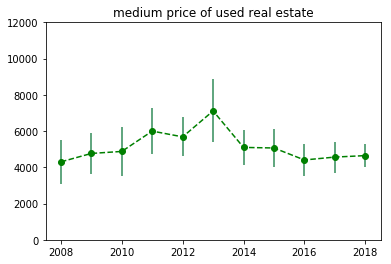

[nan, nan, nan, nan, 9378.0, nan, 6054.0, 7932.0, 6213.0, 6017.0, 5878.0]
[nan, nan, nan, nan, 1136.0, nan, 1760.0, 1541.0, 1068.0, 739.0, 368.0]


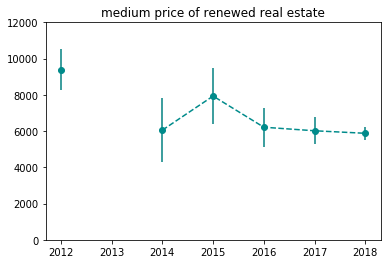

Microzona_02.pdf
[891.0, 877.0, 363.0, 1331.0, 872.0, 1245.0, 957.0, 794.0, 536.0, 657.0, 713.0]
###############
OICT/PKL_02.pkl


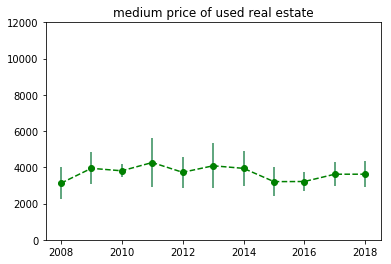

[6065.0, 6017.0, 5803.0, 6053.0, 5689.0, 5293.0, 4418.0, 6107.0, 4373.0, 5420.0, 3696.0]
[1641.0, 350.0, 968.0, 992.0, 1192.0, 793.0, 736.0, 2407.0, 1079.0, 3251.0, 273.0]


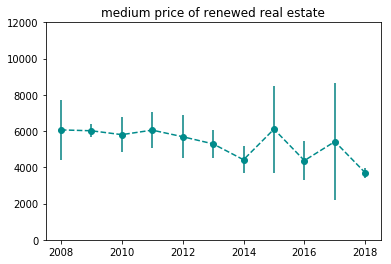

Microzona_03.pdf
[728.0, 1102.0, 1223.0, 753.0, 677.0, 442.0, 662.0, 908.0, 790.0, 757.0, 809.0]
###############
OICT/PKL_03.pkl


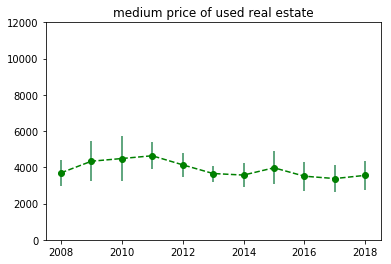

[5144.0, 4713.0, nan, 5720.0, 6335.0, 4050.0, nan, nan, nan, nan, nan]
[298.0, 230.0, nan, 687.0, 500.0, 1370.0, nan, nan, nan, nan, nan]


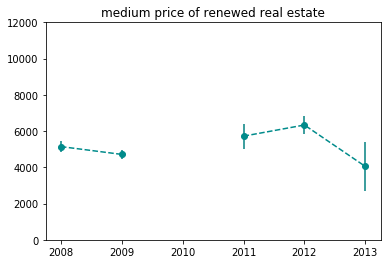

Microzona_04.pdf
[587.0, 971.0, 718.0, 601.0, 518.0, 618.0, 512.0, 603.0, 674.0, 893.0, 443.0]
###############
OICT/PKL_04.pkl


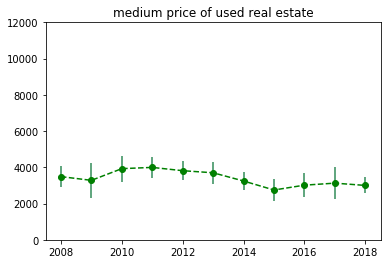

[3375.0, 6174.0, 6174.0, nan, nan, nan, 5256.0, 4912.0, nan, 3817.0, nan]
[519.0, 225.0, 225.0, nan, nan, nan, 651.0, 707.0, nan, 603.0, nan]


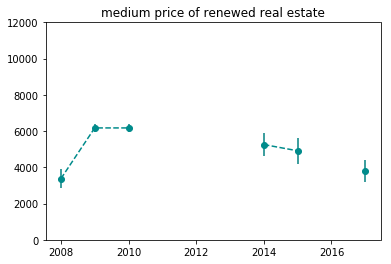

Microzona_05.pdf
[732.0, 675.0, 802.0, 851.0, 610.0, 555.0, 668.0, 853.0, 486.0, 501.0, 623.0]
###############
OICT/PKL_05.pkl


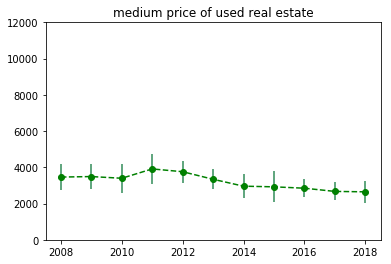

[4379.0, 4433.0, 4046.0000000000005, 5659.0, 5099.0, 5509.0, 4521.0, 4577.0, 4830.0, 4133.0, 4407.0]
[926.0, 734.0, 359.0, 1124.0, 915.0, 908.0, 1201.0, 1186.0, 761.0, 979.0, 660.0]


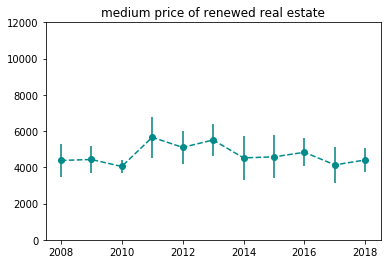

Microzona_06.pdf
[453.0, 652.0, 612.0, 388.0, 501.0, 1225.0, 793.0, 1046.0, 607.0, 1516.0, 513.0]
###############
OICT/PKL_06.pkl


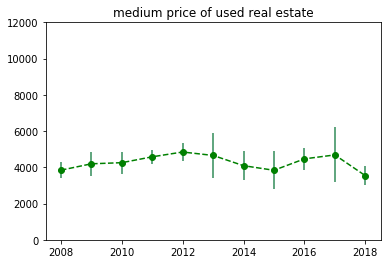

[nan, nan, nan, nan, nan, nan, nan, 4779.0, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, 389.0, nan, nan, nan]


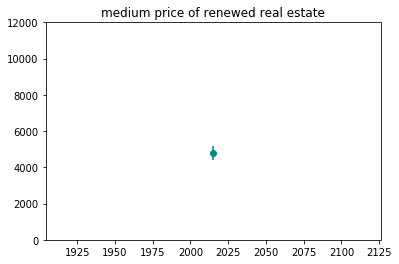

Microzona_07.pdf
[499.0, 706.0, 744.0, 563.0, 909.0, 622.0, 796.0, 952.0, 551.0, 782.0, 686.0]
###############
OICT/PKL_07.pkl


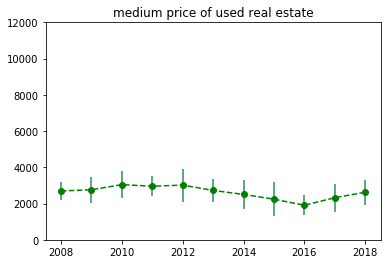

[3419.0, 3611.0, 4014.9999999999995, 3889.0, 3837.0, 3466.0, 3970.0, 3075.0, 3416.0, 3726.0, 3181.0]
[541.0, 1000.9999999999999, 549.0, 466.0, 815.0, 908.0, 530.0, 637.0, 955.0, 759.0, 769.0]


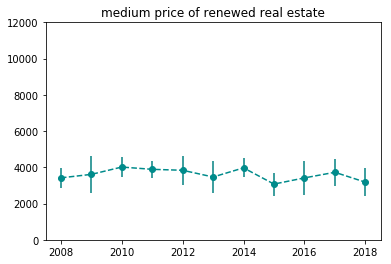

Microzona_08.pdf
[691.0, 595.0, 791.0, 2496.0, 861.0, 696.0, 891.0, 606.0, 1000.0, 673.0, 490.0]
###############
OICT/PKL_08.pkl


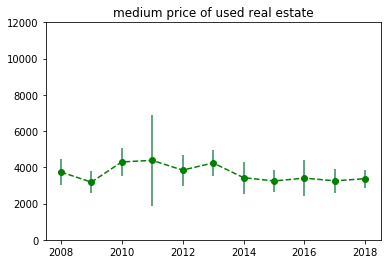

[6863.0, 6735.0, 5807.0, 5704.0, 6557.0, nan, 5386.0, 6515.0, 5630.0, 5805.0, nan]
[668.0, 770.0, 770.0, 580.0, 2067.0, nan, 776.0, 561.0, 784.0, 530.0, nan]


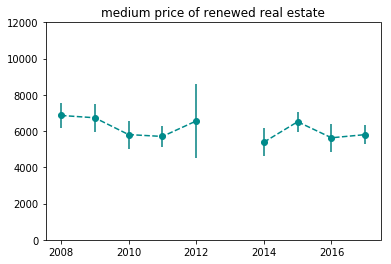

Microzona_09.pdf
[637.0, 464.0, 576.0, 1272.0, 507.0, 769.0, 1100.0, 992.0, 882.0, 539.0, 483.0]
###############
OICT/PKL_09.pkl


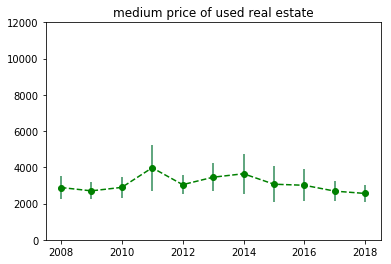

[4542.0, 5446.0, 5516.0, nan, 4772.0, 3010.0, 3347.0, 3234.0, 3602.0, 3531.0, 3784.0]
[235.0, 656.0, 396.0, nan, 864.0, 677.0, 128.0, 638.0, 772.0, 383.0, 815.0]


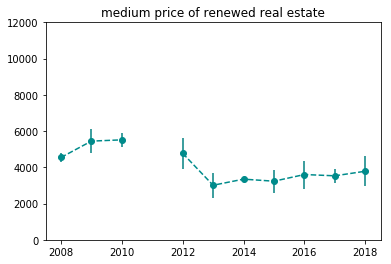

Microzona_10.pdf
[410.0, 598.0, 413.0, 646.0, 499.0, 475.0, 587.0, 929.0, 713.0, 566.0, 371.0]
###############
OICT/PKL_10.pkl


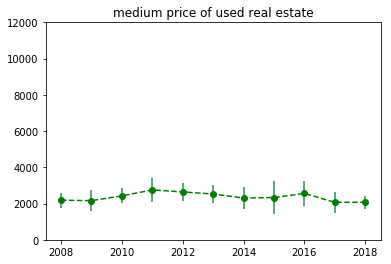

[nan, nan, nan, 4836.0, nan, 2967.0, 2781.0, nan, 2671.0, 2780.0, nan]
[nan, nan, nan, 504.0, nan, 690.0, 33.0, nan, 285.0, 321.0, nan]


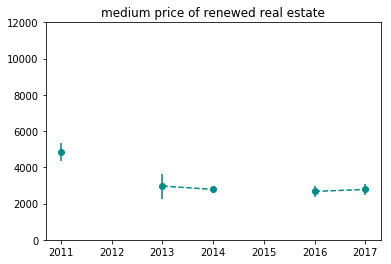

Microzona_11.pdf
[379.0, 420.0, 772.0, 621.0, 608.0, 466.0, 523.0, 604.0, 519.0, 455.0, 322.0]
###############
OICT/PKL_11.pkl


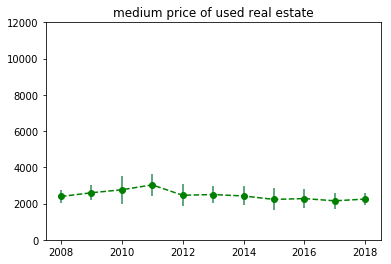

[3577.0, 5009.0, 4502.0, 3973.0, 3477.0, 3674.0, 3487.0, 3018.0, 3129.0, 3246.0, 2974.0]
[614.0, 1980.0, 697.0, 501.0, 255.0, 472.0, 428.0, 166.0, 477.0, 440.0, 383.0]


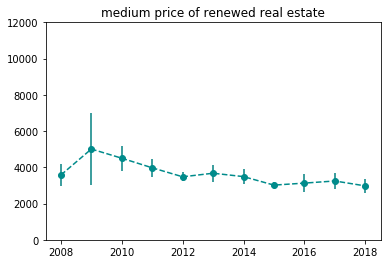

Microzona_12.pdf
[430.0, 398.0, 742.0, 594.0, 566.0, 537.0, 426.0, 485.0, 321.0, 347.0, 437.0]
###############
OICT/PKL_12.pkl


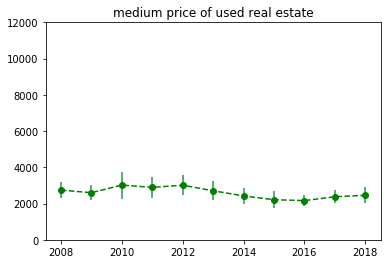

[3388.0, nan, 3753.0, 3902.0, 3322.0, nan, 2913.0, 2942.0, nan, nan, nan]
[121.0, nan, 393.0, 402.0, 501.0, nan, 283.0, 354.0, nan, nan, nan]


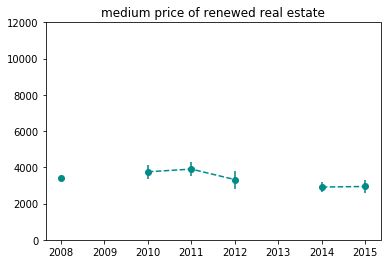

Microzona_13.pdf
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
###############
OICT/PKL_13.pkl


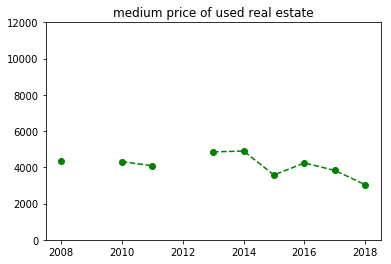

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


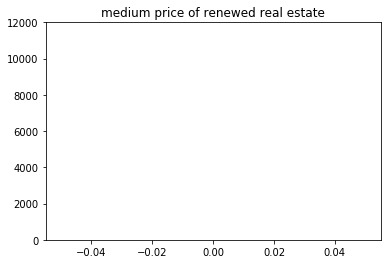

Microzona_14.pdf
[674.0, 529.0, 748.0, 912.0, 660.0, 709.0, 881.0, 544.0, 788.0, 584.0, 381.0]
###############
OICT/PKL_14.pkl


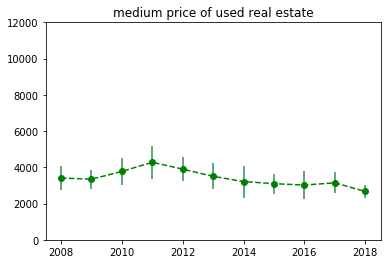

[5290.0, nan, nan, nan, nan, nan, nan, nan, nan, 2815.0, nan]
[632.0, nan, nan, nan, nan, nan, nan, nan, nan, 103.0, nan]


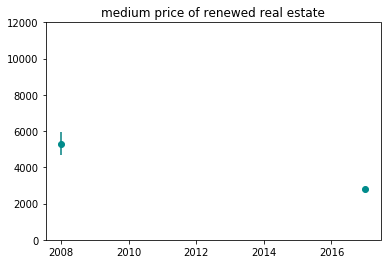

Microzona_15.pdf
[284.0, 634.0, 513.0, 452.0, 474.0, 605.0, 431.0, 517.0, 666.0, 386.0, 512.0]
###############
OICT/PKL_15.pkl


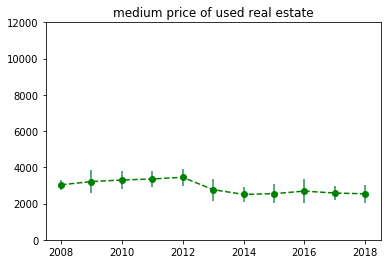

[4672.0, 4196.0, 4461.0, 5150.0, 4562.0, nan, 3083.0, nan, 3490.0, 3461.0, nan]
[232.0, 678.0, 86.0, 414.0, 123.0, nan, 117.0, nan, 164.0, 165.0, nan]


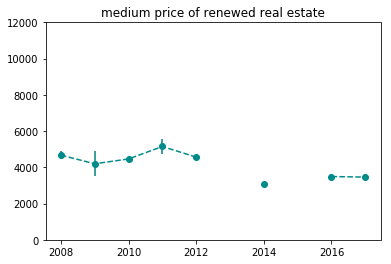

Microzona_16.pdf
[nan, nan, 225.0, 634.0, 1662.0, 787.0, 780.0, 1016.0, 1417.0, 1192.0, 73.0]
###############
OICT/PKL_16.pkl


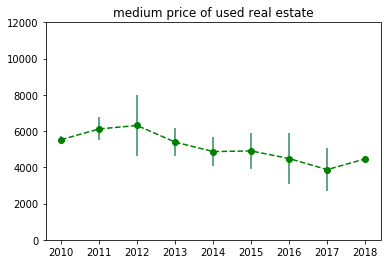

[nan, nan, nan, nan, nan, nan, 6242.0, 5444.0, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, 1165.0, 1301.0, nan, nan, nan]


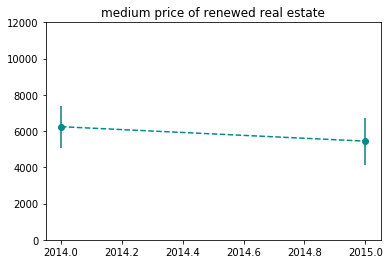

Microzona_17.pdf
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
###############
OICT/PKL_17.pkl


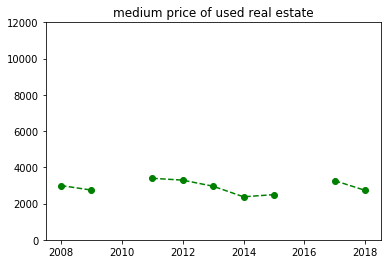

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


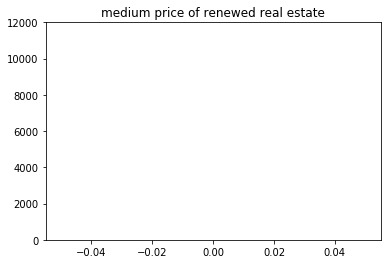

Microzona_18.pdf
[425.0, 613.0, 816.0, 677.0, 946.0, 664.0, 661.0, 465.0, 400.0, 372.0, 586.0]
###############
OICT/PKL_18.pkl


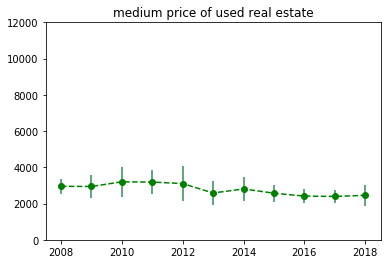

[3532.0, 3845.0, 4040.0, 3971.0, nan, nan, 3127.0, nan, 2774.0, 4003.9999999999995, 4114.0]
[511.0, 71.0, 357.0, 226.0, nan, nan, 751.0, nan, 567.0, 832.0, 586.0]


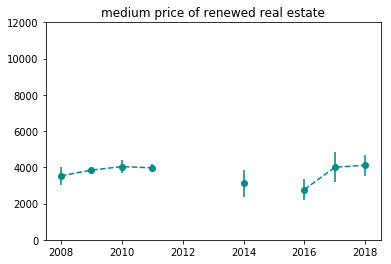

Microzona_19.pdf
[479.0, 322.0, 611.0, 650.0, 470.0, 444.0, 687.0, 515.0, 411.0, 554.0, 435.0]
###############
OICT/PKL_19.pkl


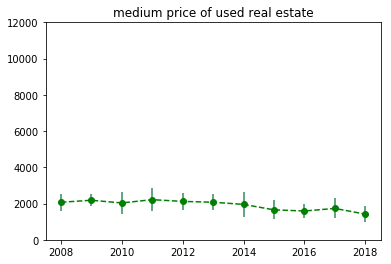

[3425.0, 2990.0, 2916.0, 2475.0, 2997.0, 2632.0, 2408.0, 2472.0, 1845.0, 2243.0, 2816.0]
[832.0, 595.0, 253.0, 196.0, 387.0, 133.0, 136.0, 301.0, 17.0, 222.0, 501.0]


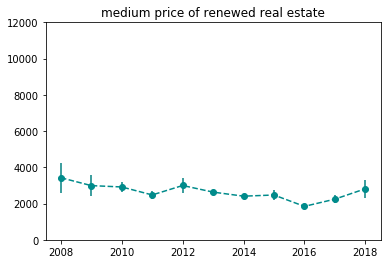

Microzona_20.pdf
[573.0, 776.0, 587.0, 799.0, 607.0, 1313.0, 964.0, 764.0, 904.0, 696.0, 556.0]
###############
OICT/PKL_20.pkl


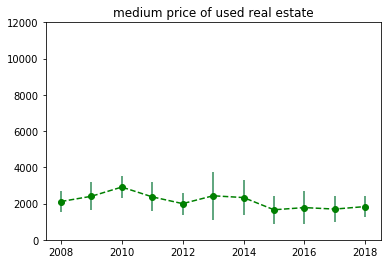

[2600.0, 4273.0, nan, 3508.0, 3721.0, 3651.0, 3631.0, 3562.0, 3624.0, 3455.0, 2441.0]
[255.0, 466.0, nan, 106.0, 329.0, 339.0, 514.0, 246.0, 121.0, 278.0, 102.0]


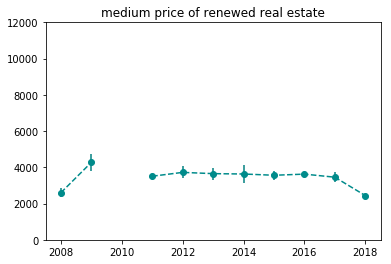

Microzona_21.pdf
[280.0, 392.0, 580.0, 319.0, 352.0, 501.0, 535.0, 458.0, 427.0, 348.0, 341.0]
###############
OICT/PKL_21.pkl


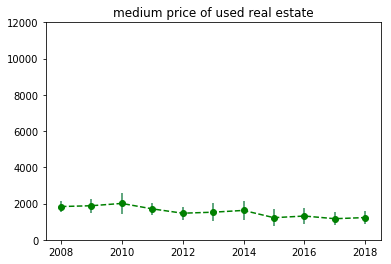

[2625.0, 2901.0, 2891.0, 2771.0, 2048.0, 2575.0, 2456.0, 1973.0, 2371.0, 2542.0, 2518.0]
[294.0, 499.0, 439.0, 714.0, 454.0, 1022.0, 836.0, 310.0, 709.0, 626.0, 424.0]


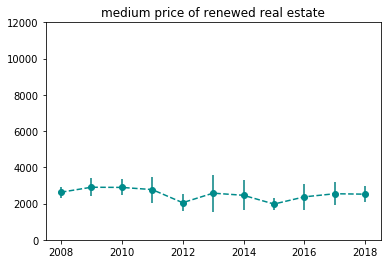

Microzona_22.pdf
[662.0, 564.0, 384.0, 604.0, 557.0, 773.0, 790.0, 668.0, 275.0, 423.0, 464.0]
###############
OICT/PKL_22.pkl


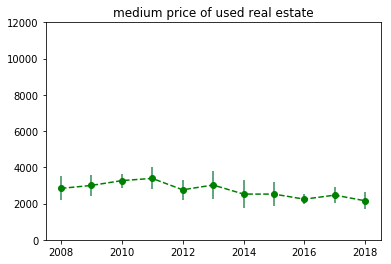

[nan, 4412.0, 4477.0, nan, 3745.0, nan, 3628.0, 3682.0, 3640.0, 2682.0, 2368.0]
[nan, 262.0, 267.0, nan, 217.0, nan, 235.0, 97.0, 227.0, 276.0, 483.0]


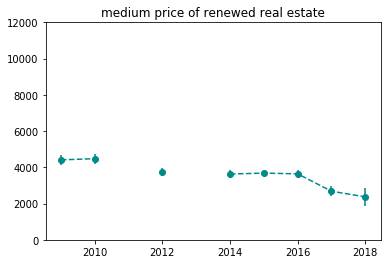

Microzona_23.pdf
[1698.0, 1119.0, 1197.0, 1346.0, 1229.0, 678.0, 758.0, 754.0, 618.0, 677.0, 473.0]
###############
OICT/PKL_23.pkl


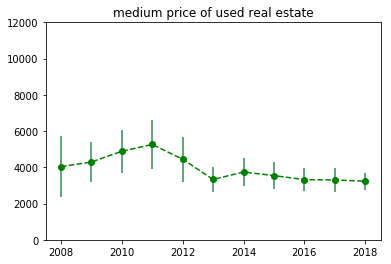

[6895.0, 5933.0, 6552.0, 6541.0, nan, nan, 5871.0, 5498.0, 4143.0, 4126.0, 4722.0]
[639.0, 1289.0, 845.0, 313.0, nan, nan, 869.0, 1106.0, 841.0, 535.0, 393.0]


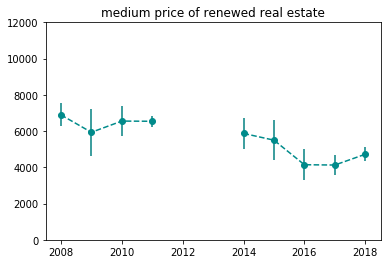

Microzona_24.pdf
[973.0, 998.0, 921.0, 1083.0, 1022.9999999999999, 978.0, 772.0, 1183.0, 854.0, 683.0, 537.0]
###############
OICT/PKL_24.pkl


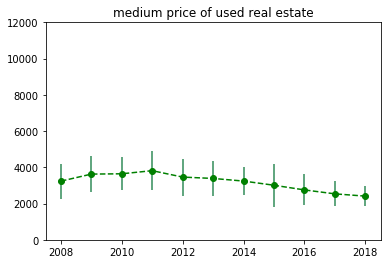

[4386.0, 3995.0, 5099.0, 5156.0, 4181.0, 4645.0, 4631.0, 3658.0, 3969.0, 4155.0, 4145.0]
[841.0, 388.0, 1110.0, 1293.0, 676.0, 368.0, 1411.0, 832.0, 842.0, 898.0, 708.0]


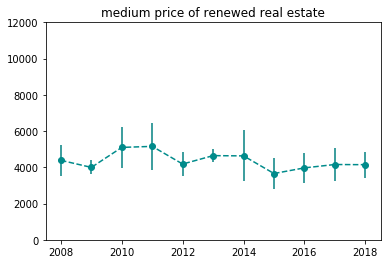

Microzona_25.pdf
[738.0, 805.0, 777.0, 1253.0, 983.0, 400.0, 492.0, 551.0, 918.0, 523.0, 685.0]
###############
OICT/PKL_25.pkl


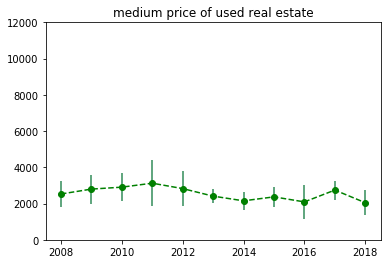

[nan, nan, nan, 5757.0, nan, nan, 3189.0, 3167.0, 3186.0, 3192.0, 3183.0]
[nan, nan, nan, 222.0, nan, nan, 44.0, 769.0, 302.0, 200.0, 243.0]


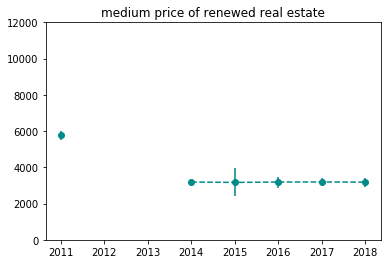

Microzona_26.pdf
[277.0, 294.0, 366.0, 625.0, 521.0, 453.0, 530.0, 690.0, 447.0, 442.0, 166.0]
###############
OICT/PKL_26.pkl


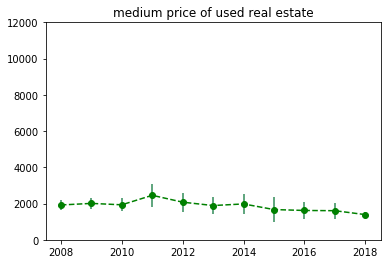

[3650.0, 3734.0, 3415.0, nan, 3426.0, 2555.0, 2653.0, 2569.0, 2755.0, nan, nan]
[193.0, 273.0, 335.0, nan, 203.0, 139.0, 43.0, 131.0, 312.0, nan, nan]


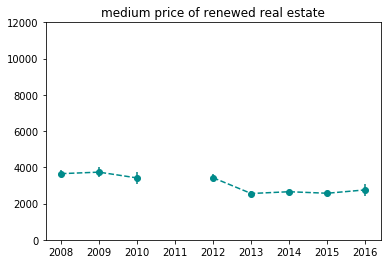

Microzona_27.pdf
[431.0, 589.0, 337.0, 493.0, 593.0, 230.0, 566.0, 330.0, 576.0, 558.0, 489.0]
###############
OICT/PKL_27.pkl


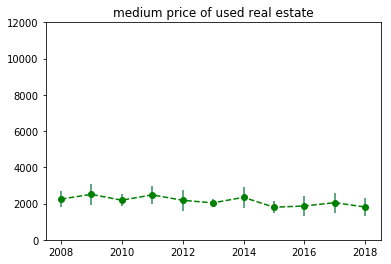

[nan, nan, nan, 2821.0, nan, nan, 2394.0, nan, nan, nan, nan]
[nan, nan, nan, 334.0, nan, nan, 149.0, nan, nan, nan, nan]


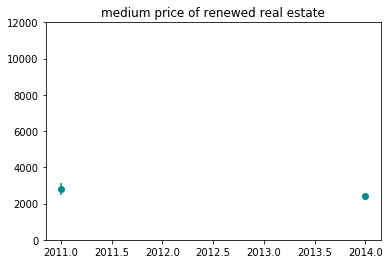

Microzona_28.pdf
[235.0, 405.0, 385.0, 403.0, 513.0, 512.0, 352.0, 499.0, 375.0, 450.0, 395.0]
###############
OICT/PKL_28.pkl


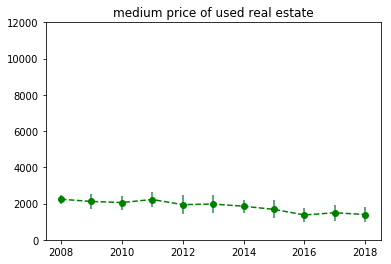

[2337.0, 2976.0, nan, nan, nan, nan, 2554.0, 2214.0, nan, 2795.0, 2914.0]
[538.0, 671.0, nan, nan, nan, nan, 645.0, 370.0, nan, 168.0, 112.0]


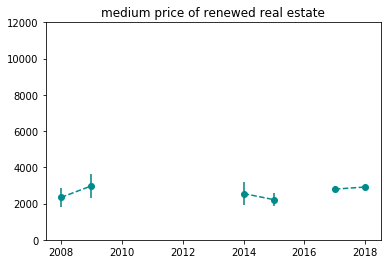

Microzona_29.pdf
[378.0, 355.0, 581.0, 503.0, 502.0, 418.0, 313.0, 438.0, 473.0, 333.0, 296.0]
###############
OICT/PKL_29.pkl


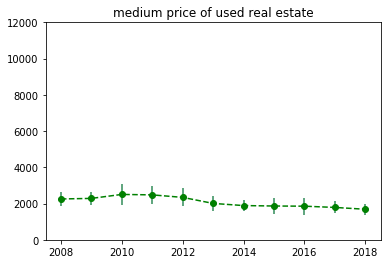

[3129.0, 3189.0, 3129.0, 3081.0, 2995.0, 2897.0, 3171.0, 2995.0, 2850.0, 2784.0, 2922.0]
[357.0, 196.0, 396.0, 177.0, 483.0, 167.0, 563.0, 419.0, 644.0, 382.0, 541.0]


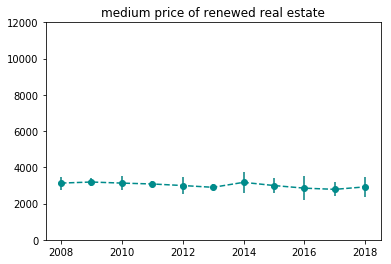

Microzona_30.pdf
[343.0, 354.0, 341.0, 360.0, 456.0, 495.0, 333.0, 442.0, 520.0, 509.0, 347.0]
###############
OICT/PKL_30.pkl


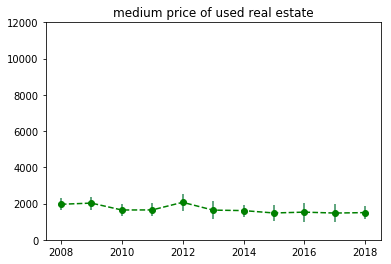

[2363.0, nan, 2677.0, 2616.0, 2337.0, nan, 2519.0, 2359.0, 2435.0, nan, nan]
[187.0, nan, 188.0, 543.0, 22.0, nan, 468.0, 421.0, 578.0, nan, nan]


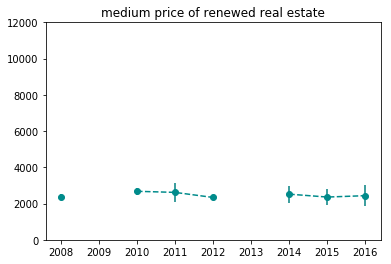

Microzona_31.pdf
[592.0, 561.0, 527.0, 372.0, 418.0, 519.0, 222.0, 299.0, 262.0, 576.0, 289.0]
###############
OICT/PKL_31.pkl


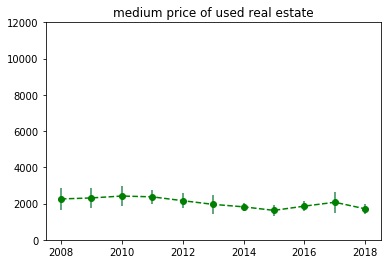

[3044.0, 3053.0, 3177.0, 3302.0, 3267.0, 3209.0, 2785.0, 2935.0, 2763.0, 2691.0, 3042.0]
[434.0, 359.0, 319.0, 740.0, 406.0, 379.0, 457.0, 410.0, 354.0, 327.0, 582.0]


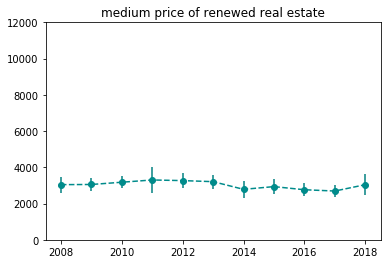

Microzona_32.pdf
[476.0, 487.0, 425.0, 665.0, 598.0, 532.0, 429.0, 514.0, 361.0, 515.0, 393.0]
###############
OICT/PKL_32.pkl


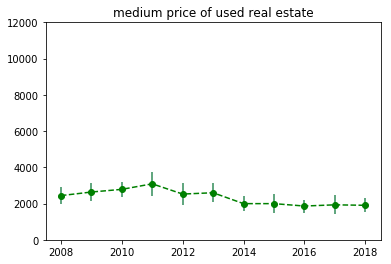

[3088.0, 3052.0, 4206.0, 3492.0, 3405.0, 3315.0, 3388.0, 3264.0, 3104.0, 2968.0, 2834.0]
[591.0, 636.0, 394.0, 560.0, 439.0, 200.0, 350.0, 459.0, 504.0, 333.0, 318.0]


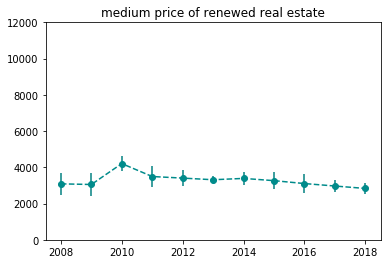

Microzona_33.pdf
[273.0, 358.0, 528.0, 505.0, 371.0, 429.0, 592.0, 439.0, 455.0, 405.0, 198.0]
###############
OICT/PKL_33.pkl


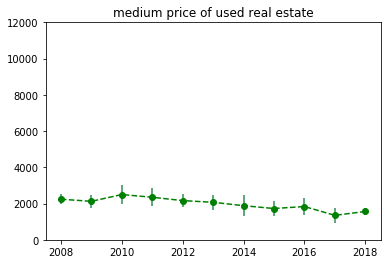

[3328.0, 3433.0, 3482.0, 2971.0, 3192.0, 3077.0, 3356.0, 3018.0, 2531.0, 2652.0, 2484.0]
[466.0, 396.0, 238.0, 550.0, 415.0, 425.0, 768.0, 439.0, 330.0, 466.0, 396.0]


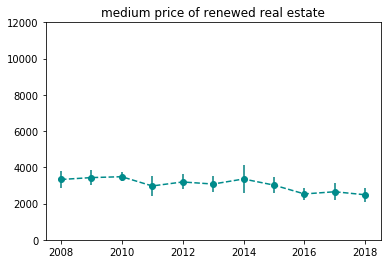

Microzona_34.pdf
[270.0, 366.0, 509.0, 200.0, 733.0, 716.0, 424.0, 357.0, 495.0, 481.0, 410.0]
###############
OICT/PKL_34.pkl


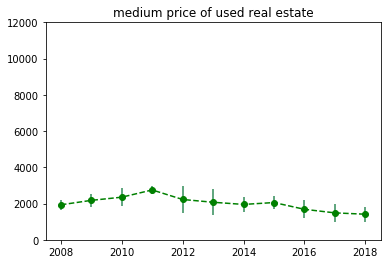

[2912.0, 2683.0, 2618.0, 2855.0, nan, 2349.0, 2738.0, 2388.0, 2234.0, 2466.0, 2037.9999999999998]
[626.0, 183.0, 244.0, 316.0, nan, 406.0, 1172.0, 77.0, 249.0, 267.0, 127.0]


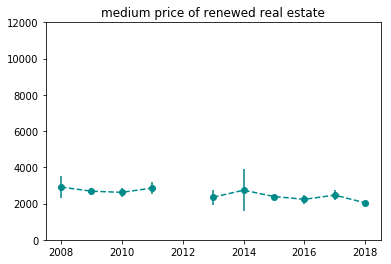

Microzona_35.pdf
[331.0, 412.0, 434.0, 443.0, 459.0, 438.0, 350.0, 355.0, 313.0, 419.0, 256.0]
###############
OICT/PKL_35.pkl


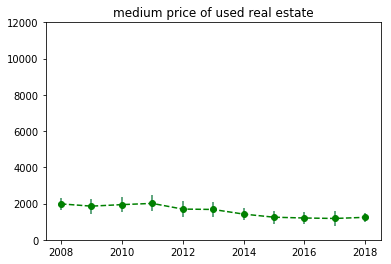

[2786.0, 3010.0, 2864.0, 2508.0, 2523.0, 2461.0, 2253.0, 2179.0, 2209.0, 2184.0, 2059.0]
[442.0, 238.0, 344.0, 351.0, 224.0, 217.0, 200.0, 195.0, 185.0, 389.0, 393.0]


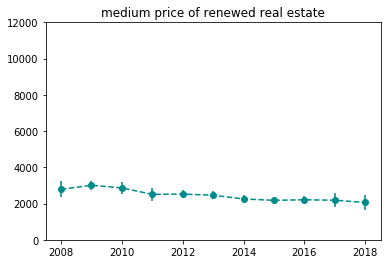

Microzona_36.pdf
[319.0, 436.0, 401.0, 477.0, 503.0, 320.0, 303.0, 416.0, 284.0, 363.0, 333.0]
###############
OICT/PKL_36.pkl


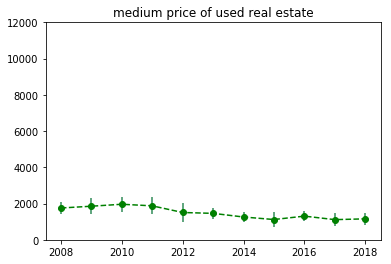

[nan, 1550.0, 2500.0, 2448.0, nan, nan, nan, nan, nan, 1906.0, 2264.0]
[nan, 74.0, 71.0, 114.0, nan, nan, nan, nan, nan, 352.0, 404.0]


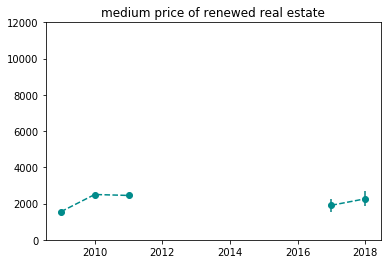

Microzona_37.pdf
[320.0, 336.0, 453.0, 428.0, 388.0, 385.0, 306.0, 326.0, 273.0, 284.0, 338.0]
###############
OICT/PKL_37.pkl


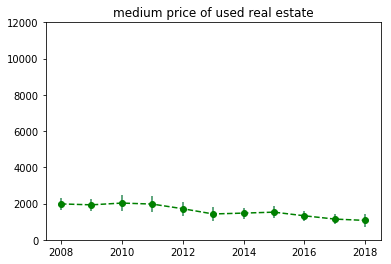

[2615.0, 2505.0, nan, 2471.0, 2529.0, 2287.0, 2339.0, 2318.0, 2061.0, nan, nan]
[115.0, 204.0, nan, 166.0, 103.0, 272.0, 149.0, 97.0, 263.0, nan, nan]


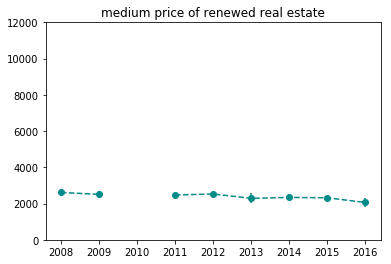

Microzona_38.pdf
[325.0, 351.0, 364.0, 338.0, 290.0, 380.0, 167.0, 636.0, 601.0, 586.0, 240.0]
###############
OICT/PKL_38.pkl


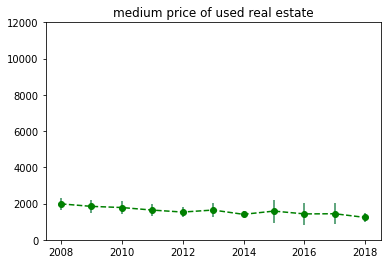

[2424.0, 2722.0, 2893.0, 2402.0, 2586.0, 2178.0, 2284.0, 2351.0, 2128.0, 2145.0, 2015.0000000000002]
[382.0, 390.0, 340.0, 289.0, 256.0, 78.0, 161.0, 235.0, 316.0, 235.0, 83.0]


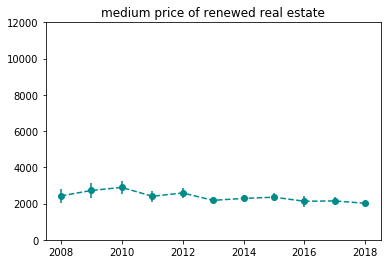

Microzona_39.pdf
[371.0, 112.0, 1135.0, 510.0, 495.0, 821.0, 203.0, 442.0, 393.0, 379.0, 251.0]
###############
OICT/PKL_39.pkl


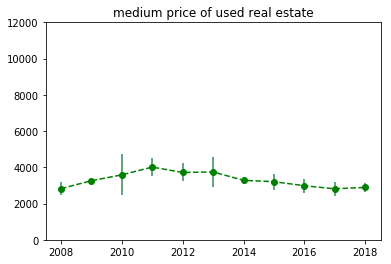

[nan, 4069.0, 4304.0, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, 279.0, 234.0, nan, nan, nan, nan, nan, nan, nan, nan]


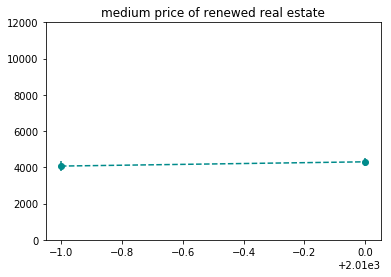

Microzona_40.pdf
[302.0, 354.0, 397.0, 520.0, 363.0, 547.0, 314.0, 502.0, 359.0, 420.0, 481.0]
###############
OICT/PKL_40.pkl


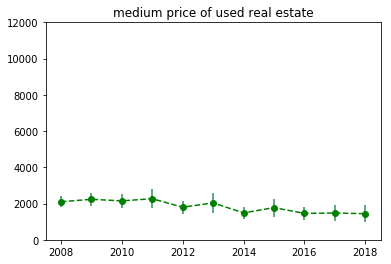

[2981.0, 2407.0, 2938.0, 2811.0, 2765.0, 2533.0, 2141.0, 2370.0, 2308.0, 2323.0, 2281.0]
[725.0, 537.0, 91.0, 440.0, 141.0, 327.0, 122.0, 274.0, 159.0, 421.0, 365.0]


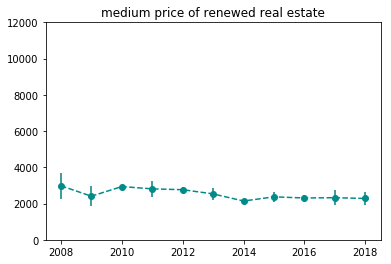

PKL_01.pkl


ValueError: could not convert string to float: (lp0

In [4]:
for f in sorted(os.listdir('OICT')):
    print f
    parsedPDF = parser.from_file('OICT/'+f)
    values=get_tables(parsedPDF)
    values[0]=correction(values[0])
    values[1]=correction(values[1])
    print values[0][3]
    print '###############'
    print 'OICT/PKL_'+f.split('_')[1].split('.')[0]+'.pkl'
    pkl.dump(values, open('OICT/PKL_'+f.split('_')[1].split('.')[0]+'.pkl','w'))
    plt.figure()
    plt.errorbar([i for i in range(2008,2019)],values[0][1],values[0][3],fmt='--o',color='green',ecolor='seagreen')
    plt.ylim(0,12000)
    plt.title('medium price of used real estate')
    plt.show()
    plt.close
    
    print values[1][1]
    print values[1][3]
    
    plt.figure()
    plt.errorbar([i for i in range(2008,2019)],values[1][1],values[1][3],fmt='--o',color='darkcyan',ecolor='teal')
    plt.ylim(0,12000)
    plt.title('medium price of renewed real estate')
    plt.show()
    plt.close

In [5]:
df_new=pd.DataFrame(index=pd.Index([i for i in xrange(41)]), columns=[i for i in range(2008,2019)])
df_used=pd.DataFrame(index=pd.Index([i for i in xrange(41)]), columns=[i for i in range(2008,2019)])

In [6]:
for f in sorted(os.listdir('OICT')):
    print f
    parsedPDF = parser.from_file('OICT/'+f)
    values=get_tables(parsedPDF)
    values[0]=correction(values[0])
    values[1]=correction(values[1])
    print '###############'
    for i in xrange(len(values[0][0])):
        df_new[2008+i][int(f.split('_')[1].split('.')[0])]=values[1][1][i]
        df_used[2008+i][int(f.split('_')[1].split('.')[0])]=values[0][1][i]
    
    

Microzona_01.pdf
###############
Microzona_02.pdf
###############
Microzona_03.pdf
###############
Microzona_04.pdf
###############
Microzona_05.pdf
###############
Microzona_06.pdf
###############
Microzona_07.pdf
###############
Microzona_08.pdf
###############
Microzona_09.pdf
###############
Microzona_10.pdf
###############
Microzona_11.pdf
###############
Microzona_12.pdf
###############
Microzona_13.pdf
###############
Microzona_14.pdf
###############
Microzona_15.pdf
###############
Microzona_16.pdf
###############
Microzona_17.pdf
###############
Microzona_18.pdf
###############
Microzona_19.pdf
###############
Microzona_20.pdf
###############
Microzona_21.pdf
###############
Microzona_22.pdf
###############
Microzona_23.pdf
###############
Microzona_24.pdf
###############
Microzona_25.pdf
###############
Microzona_26.pdf
###############
Microzona_27.pdf
###############
Microzona_28.pdf
###############
Microzona_29.pdf
###############
Microzona_30.pdf
###############
Microzona_

ValueError: could not convert string to float: (lp0

In [123]:
pkl.dump(df_new, open('OICT/PKL_files/df_new.pkl','w'))
pkl.dump(df_used, open('OICT/PKL_files/df_used.pkl','w'))

IOError: File not open for writing

# Plotting the data

In [125]:
df_new=pd.read_pickle('OICT/PKL_files/df_new.pkl')
df_used=pd.read_pickle('OICT/PKL_files/df_used.pkl')

In [7]:
import geopandas
import pandas as pd
#import geoplot
import os
import descartes
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
import pyproj
import Instaplot as IP
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import exposure
import shapely
from shapely.geometry import Point

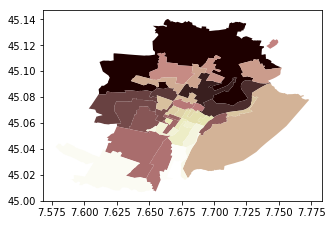

In [8]:
#The file we got from the TOrino website is in Gauss-Boaga projection. its EPSG code is 3003 but it does not know it.
df = geopandas.read_file('microzone_censuarie_geo/microzone_censuarie_geo.shp')

#We have to tell it:
df.crs={'init':'epsg:3003'}
#And then to plot it in the usual GPS coordinates.
df.to_crs(epsg=4326).plot(figsize=(5,5),cmap='pink')#.to_crs({'proj': 'merc'}).plot()
#df_new['ZONASTAT']=pd.Series(index=df_new.index)
#df.sort_values('ZONASTAT')

In [9]:
df_new.sort_index(inplace=True)
df_new=geopandas.GeoDataFrame(df_new)
df=df[['MICRO','geometry']]
df.set_index('MICRO')
df_geo=df_new.sort_index().join(df.set_index('MICRO').sort_index())
df_geo.crs={'init':'epsg:3003'}
df_geo.fillna(-1,inplace=True)
df_geo.drop(0, inplace=True)

In [10]:
vmins=[]
vmaxs=[]
for column in df_geo.columns[:-1]:
    dat=[e for e in df_geo[column].tolist() if  e!=-1]
    vmins.append(min(dat))
    vmaxs.append(max(dat))
vmax_new=max(vmaxs)
vmin_new=min(vmins)

In [11]:
df_used.sort_index(inplace=True)
df_used=geopandas.GeoDataFrame(df_used)
df=df[['MICRO','geometry']]
df.set_index('MICRO')
df_geo2=df_used.sort_index().join(df.set_index('MICRO').sort_index())
df_geo2.crs={'init':'epsg:3003'}
df_geo2.fillna(-1,inplace=True)
df_geo2.drop(0, inplace=True)

In [12]:
vmins=[]
vmaxs=[]
for column in df_geo2.columns[:-1]:
    dat=[e for e in df_geo2[column].tolist() if  e!=-1]
    vmins.append(min(dat))
    vmaxs.append(max(dat))
vmax_old=max(vmaxs)
vmin_old=min(vmins)

In [13]:
vmin=min(vmin_new,vmin_old)
vmax=max(vmax_new,vmax_old)

2008
1070.0


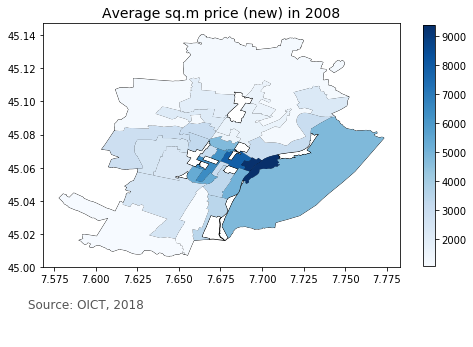

2009
1070.0


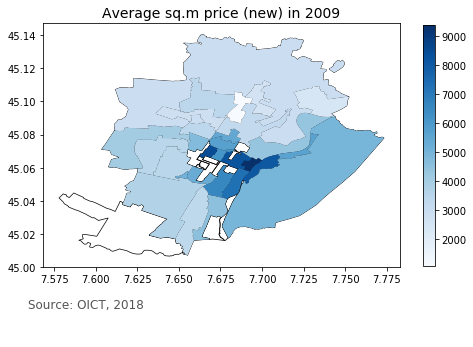

2010
1070.0


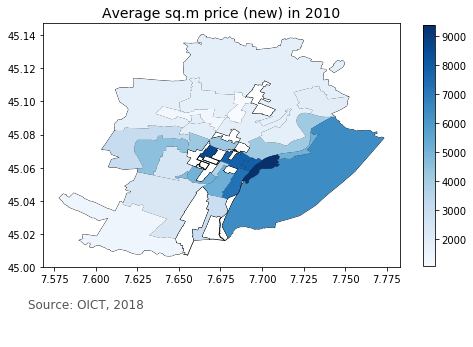

2011
1070.0


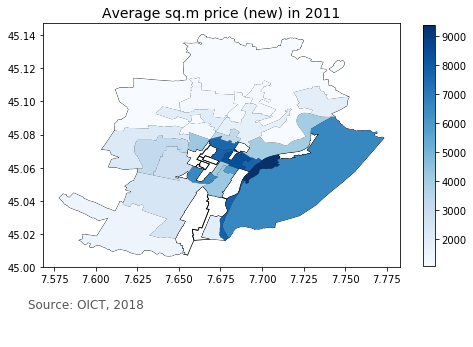

2012
1070.0


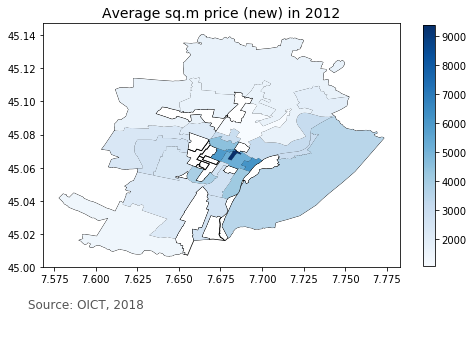

2013
1070.0


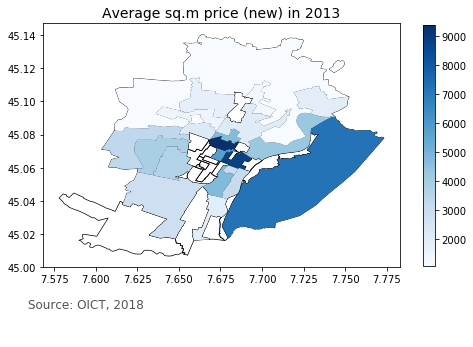

2014
1070.0


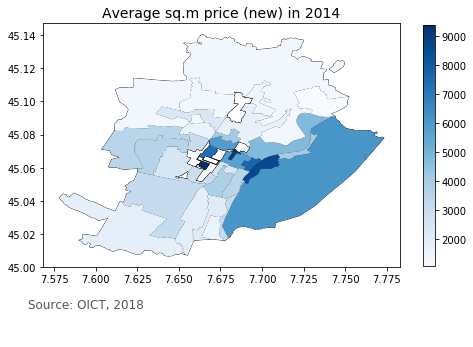

2015
1070.0


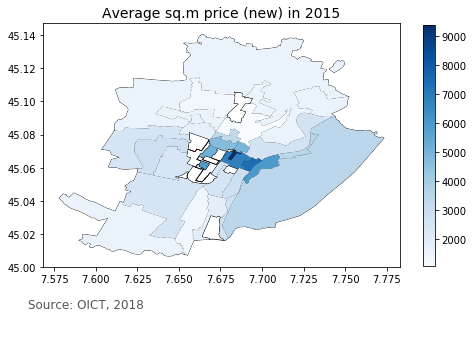

2016
1070.0


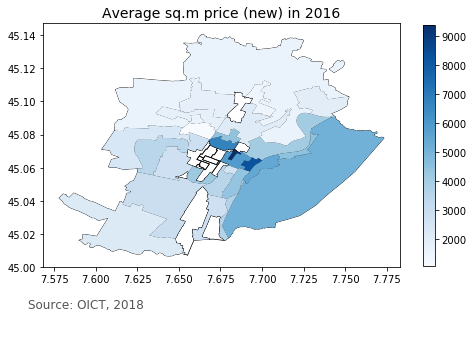

2017
1070.0


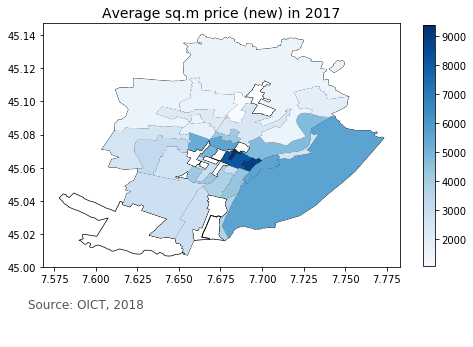

2018
1070.0


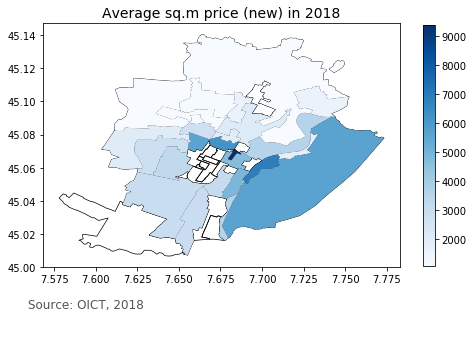

In [19]:
for column in df_geo.columns[:-1]:
    print column
    siz=7
    dat=[e for e in df_geo[column].tolist()]
    print vmin
    ax = df_geo.to_crs(epsg=4326).plot(figsize=(siz,siz), linewidth=float(siz)/10, edgecolor='black', color=(0,0,0,0))
    df_geo[[column,'geometry']][df_geo[column]>0].to_crs(epsg=4326).plot(column=column, ax=ax,cmap='Blues')
    
    # add a title
    ax.set_title('Average sq.m price (new) in {}'.format(column), fontdict={'fontsize': str(2*siz), 'fontweight' : '3'})

    # create an annotation for the data source
    ax.annotate('Source: OICT, 2018', xy=(.06, .14), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []

    # add the colorbar to the figure
    cbar = plt.colorbar(sm,shrink=.5)
    ax.axis='off'
    plt.tight_layout()
    if siz==15:
        plt.savefig('Housing_prices/new/price_new_{}.pdf'.format(column))
    if siz==7:
        plt.savefig('Housing_prices/new/price_new_{}_mini.pdf'.format(column))
    plt.show()
    plt.close()

In [20]:
df_used.sort_index(inplace=True)
df_used=geopandas.GeoDataFrame(df_used)
df=df[['MICRO','geometry']]
df.set_index('MICRO')
df_geo2=df_used.sort_index().join(df.set_index('MICRO').sort_index())
df_geo2.crs={'init':'epsg:3003'}
df_geo2.fillna(-1,inplace=True)
df_geo2.drop(0, inplace=True)

2008
1070.0


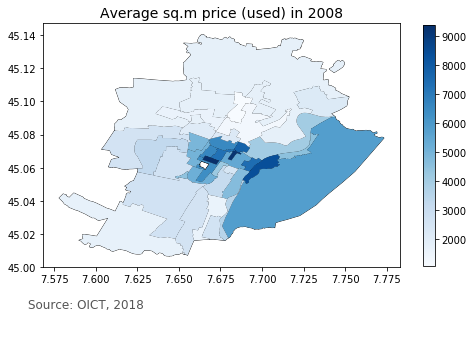

2009
1070.0


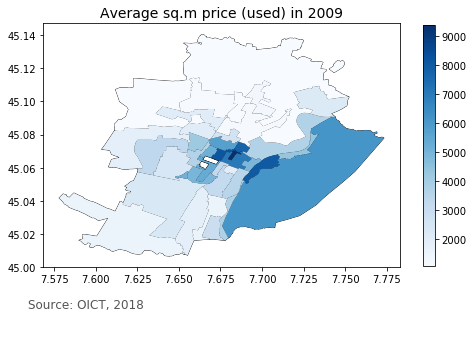

2010
1070.0


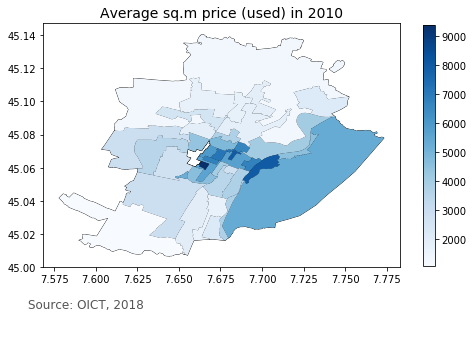

2011
1070.0


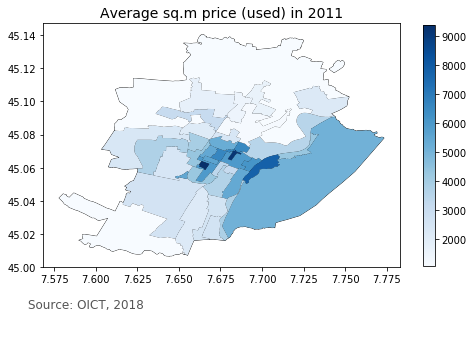

2012
1070.0


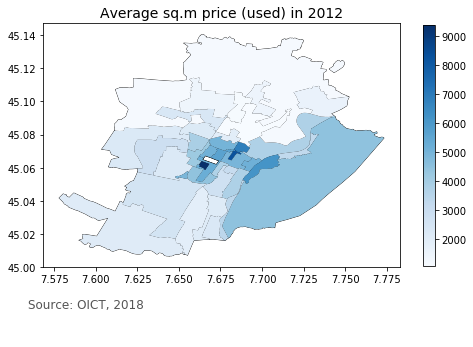

2013
1070.0


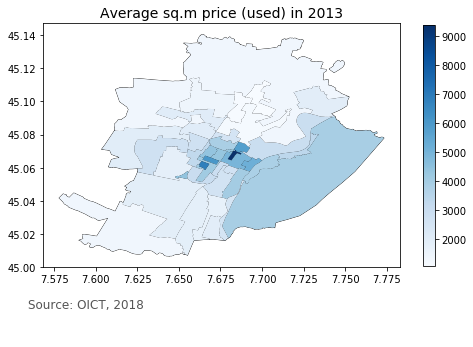

2014
1070.0


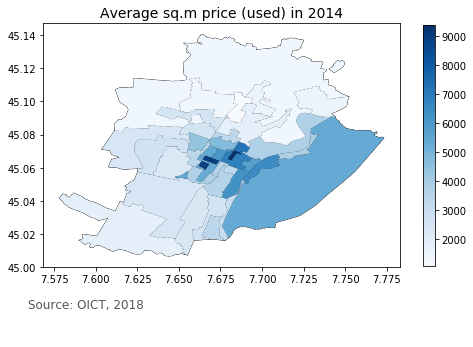

2015
1070.0


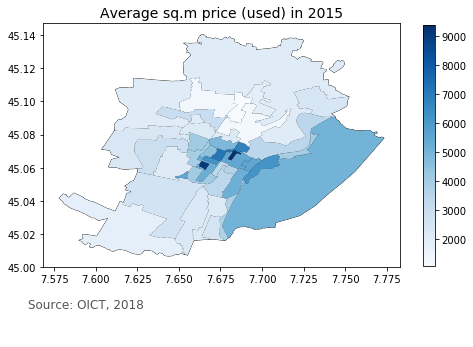

2016
1070.0


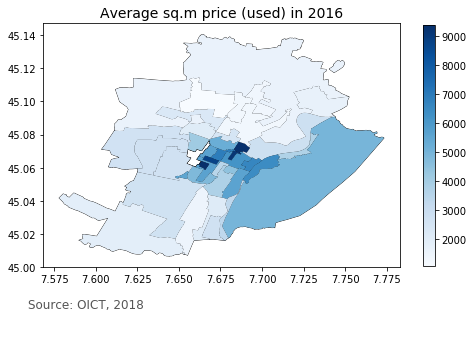

2017
1070.0


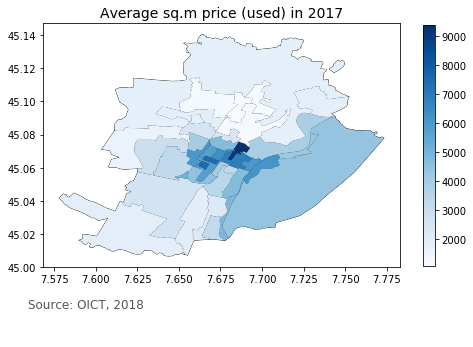

2018
1070.0


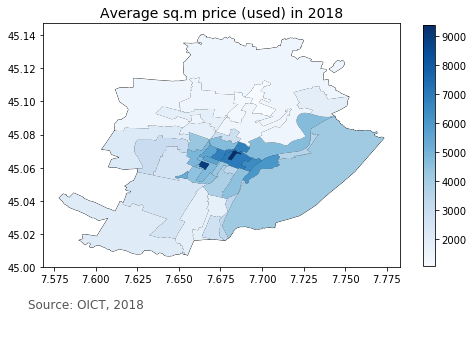

In [22]:
for column in df_geo2.columns[:-1]:
    siz=7
    print column
    dat=[e for e in df_geo2[column].tolist()]
    print vmin
    ax = df_geo2.to_crs(epsg=4326).plot(figsize=(siz,siz), linewidth=float(siz)/10, edgecolor='black', color=(0,0,0,0))
    df_geo2[[column,'geometry']][df_geo2[column]>0].to_crs(epsg=4326).plot(column=column, ax=ax,cmap='Blues')
    ax.axis='off'
    # add a title
    ax.set_title('Average sq.m price (used) in {}'.format(column), fontdict={'fontsize': str(siz*2), 'fontweight' : '3'})

    # create an annotation for the data source
    ax.annotate('Source: OICT, 2018', xy=(.06, .14), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []

    # add the colorbar to the figure
    cbar = plt.colorbar(sm,shrink=.5)
    plt.tight_layout()
    if siz==15:
        plt.savefig('Housing_prices/old/price_used_{}.pdf'.format(column))
    if siz==7:
        plt.savefig('Housing_prices/old/price_used_{}_mini.png'.format(column))
    plt.show()
    plt.close()